In [1]:
import sys
import numpy as np
import exemplos.plot_graph as pg
import matplotlib.pyplot as plt
from exemplos.GFT import GFT
from functools import reduce
import gsp_lib.util as gsp_util

# fig 2 gaussian
import seaborn as sns
import matplotlib.colors as cm
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
import networkx as nx

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style("whitegrid")


In [2]:
 def plot_function_stem(G, posx, fs, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    markerline, stemlines, baseline = plt.stem(posx, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, 'color', '#222222', 'markersize', 1.5) 
    plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1) 
    plt.setp(baseline, 'color', '#333333', 'linewidth', 1) 
    plt.ylim(lims)

def plot_function_color(G, pos, fs, cmap, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    # cmap = ListedColormap(sns.color_palette('Spectral_r', 255)[0:])
#     cmap = sns.cubehelix_palette(as_cmap=True)
    
    nx.draw_networkx_edges(G, pos=pos,  edge_color="#333333", width=.7)
    nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=fs, node_size=35, 
                                   cmap=cmap, linewidths=.6, vmin=lims[0], vmax=lims[1])
    nodes.set_edgecolor('#999999')
    nodes.set_zorder(8)
    # nodes.set_alpha(.8)

def plot_function(G, pos, fs, cmap, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    margin = .02
    posx = [pos[n][0] for n in G.nodes()]
    plot_function_stem(G, posx, fs, [lims[0]-margin, lims[1]+margin])
    plot_function_color(G, pos, fs, cmap, lims)
#     plt.gca().set_aspect('equal', 'datalim')

#     plt.xticks([])

In [3]:
n_nodes = 64 

G=nx.path_graph(n_nodes)
pos = {a: (a, 0) for a in range(n_nodes)}

L, S, U = gsp_util.get_fourier_base(G, 'unnormalized')

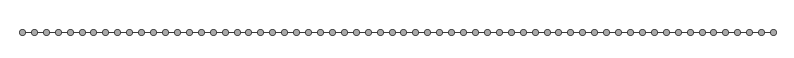

In [30]:
plt.figure(figsize=(10,.5))

nx.draw_networkx_edges(G, pos=pos,  edge_color="#333333", width=.7)
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color='#aaaaaa', node_size=20, 
                               linewidths=.6)
nodes.set_edgecolor('#333333')
plt.ylim([-.11,.15])
plt.xlim([-1,n_nodes])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('path_graph.pdf', bbox_inches='tight')
plt.show()

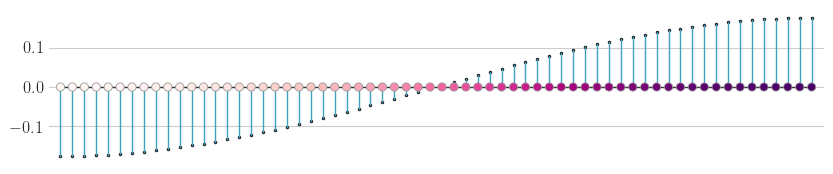

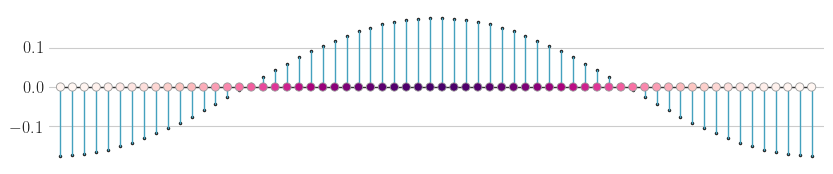

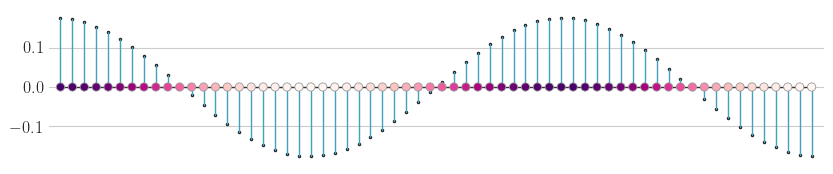

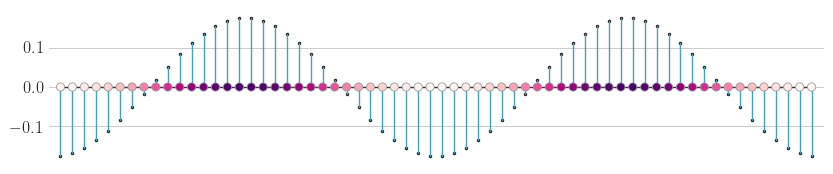

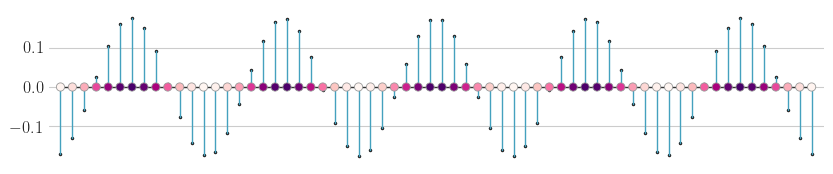

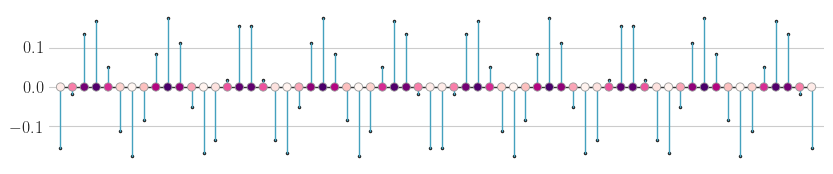

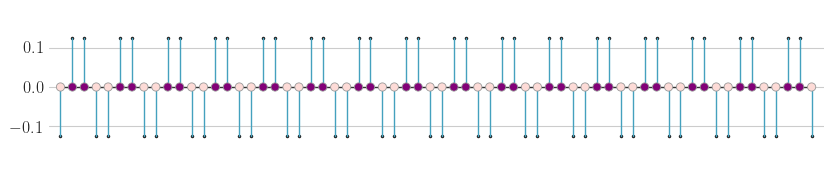

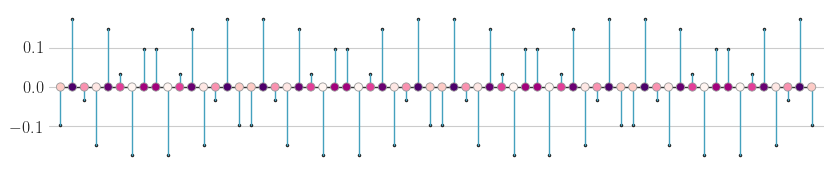

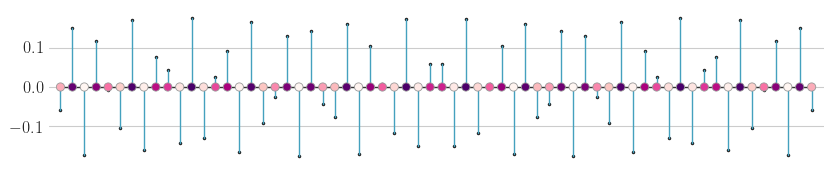

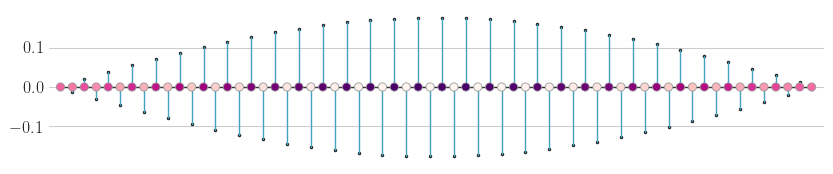

In [4]:
###########
# Graph Function
###########

flims = [np.min(U), np.max(U)]
cmap = ListedColormap(sns.color_palette('RdPu', 255))

# prop = fm.FontProperties(fname='/Users/pao/Library/Fonts/cmunrm.ttf')
# ax.set_title('This is some random font', fontproperties=prop, size=32)
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['CMU Serif']}, size=12)

for l in [1, 2, 3, 4, 10, 20, 32, 40, 50, 63]:
    fs = np.array(U[:,l])
    plt.figure(figsize=(10,2))
    plot_function(G, pos, fs, cmap, lims=flims)
#     plt.axis('off')
    plt.xticks([])
    plt.xlim([-1,n_nodes])
    sns.despine(left=True, bottom=True)
#     plt.title('$u_{{ {} }}$'.format(l), loc='left', fontsize=20)
    plt.savefig('path_u_{}.pdf'.format(l), bbox_inches='tight')
    plt.show()

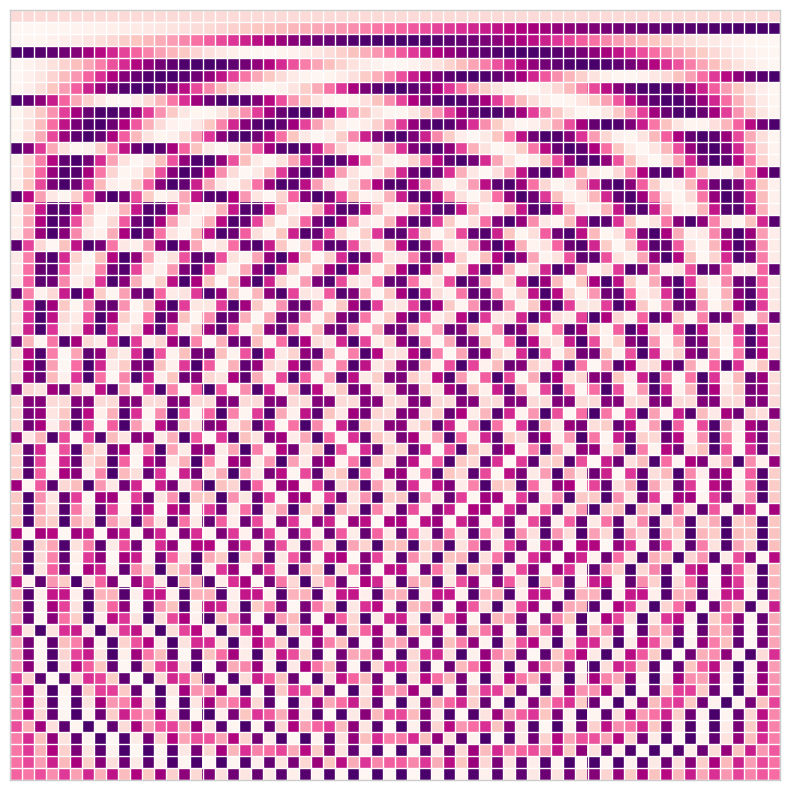

In [15]:
from matplotlib import ticker

def plot_u_mat(w):
    cmap = ListedColormap(sns.color_palette('RdPu', 255))
    max_value = np.max(np.abs(w))
    lims = [-max_value, max_value]

    n_scales, n_nodes = w.shape
    plt.figure(figsize=(10,10))

    plt.imshow(w, interpolation='none', vmin=lims[0], vmax=lims[1], cmap=cmap)
#     cb = plt.colorbar(orientation="vertical",  shrink=.6, aspect=10, pad=0.02)
#     cb.ax.tick_params(labelsize=10)
#     tick_locator = ticker.MaxNLocator(nbins=5)
#     cb.locator = tick_locator
#     cb.update_ticks()
    
    ax = plt.gca()
    
    # Major ticks
    ax.set_xticks([]);
    ax.set_yticks([]);

    ax.set_xticks(np.arange(-.5, n_nodes, 1), minor=True);
    ax.set_yticks(np.arange(-.5, n_scales, 1), minor=True);
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    
plot_u_mat(U.T)
plt.savefig('u.pdf')
plt.show()

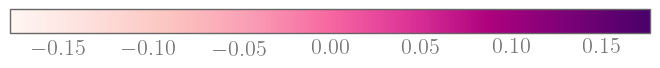

In [95]:

cb_arr = [np.linspace(flims[0], flims[1], 256)]

plt.figure(figsize=(8, .4))

cb_img = plt.imshow(cb_arr, cmap=cmap)
plt.gca().set_visible(False)

cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cb = plt.colorbar(orientation="horizontal", cmap=cmap, cax=cax)

cb.outline.set_edgecolor('#666666')
cb.ax.tick_params(axis='both', colors='#777777')
plt.savefig('path_cbar.pdf', bbox_inches='tight')
plt.show()



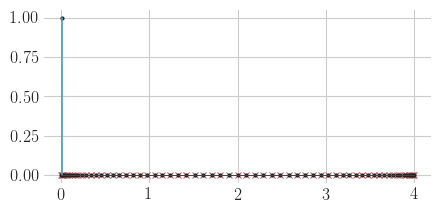

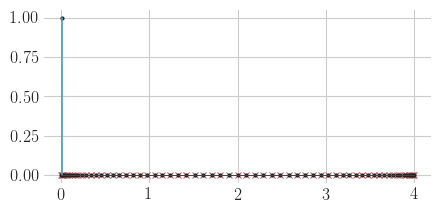

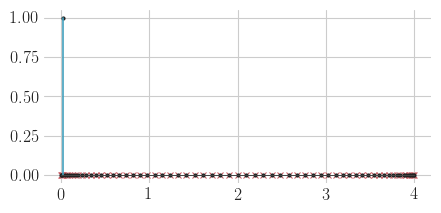

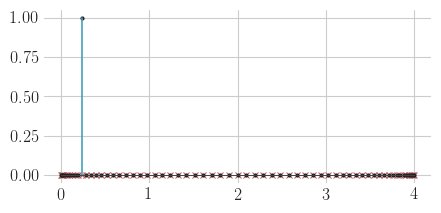

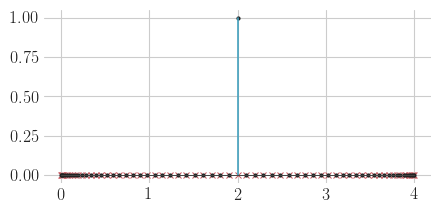

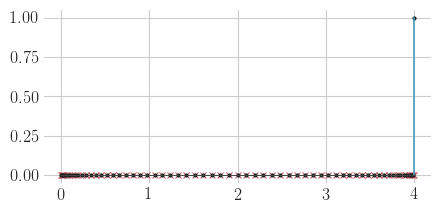

In [18]:
# sns.set_style("white")
# for l in [1, 2, 3, 10, 32, 63]:
for l in [1, 2, 3, 10, 32, 63]:
    fs = np.array(U[:,l])
    fst = np.dot(U.T, fs)
    
    plt.figure(figsize=(5,2.25))
    plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
    markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
    plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
    plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
    plt.savefig('path_spectrum_u{}.pdf'.format(l),bbox_inches='tight')
    # plt.axis('off')
    sns.despine(left=True, bottom=True)

    plt.show()

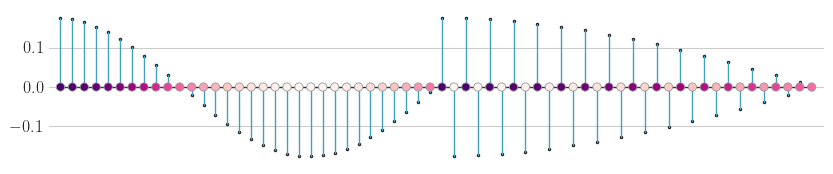

In [26]:
flims = [np.min(U), np.max(U)]
cmap = ListedColormap(sns.color_palette('RdPu', 255))


# prop = fm.FontProperties(fname='/Users/pao/Library/Fonts/cmunrm.ttf')
# ax.set_title('This is some random font', fontproperties=prop, size=32)
# plt.rc('text', usetex=True)
# plt.rc('font',**{'family':'serif','serif':['CMU Serif']}, size=16)

l='3_63'
fs = np.array(U[:,3])
fs[32:] = np.array(U[32:,63])
# fs = np.random.rand(n_nodes)*2-1
plt.figure(figsize=(10,2))
plot_function(G, pos, fs, cmap)#, lims=flims)
# plt.axis('off')
plt.xticks([])
plt.xlim([-1,n_nodes])
sns.despine(left=True, bottom=True)

# plt.title('$u_{{ {} }}$'.format(l), loc='left')
plt.savefig('path_u{}.pdf'.format(l), bbox_inches='tight')
plt.show()

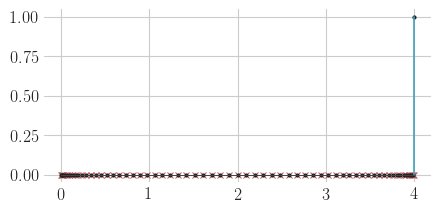

In [29]:
fst = np.dot(U.T, fs)
    
plt.figure(figsize=(5,2.25))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
plt.savefig('path_spectrum_u{}.pdf'.format(l),bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()

In [ ]:
U